In [1]:
### ESTE É UM TRABALHO DE PESQUISA ACADEMIA DA DISCIPLINA DO CURSO DE CIÊNCIAS ECONÔMICAS
#### MATÉRIA : TÉCNICAS DE PESQUISA EM ECONOMIA

###Taxa Básica de Juros de Curto Prazo da Economia

In [2]:
## bibliotecas
from IPython.display import clear_output
!pip install ipeadatapy
# Link: http://www.luanborelli.net/ipeadatapy/docs/usage/quickstart/extraction.html#extracting-one-single-time-series

!pip install pybacen #Dados BCB
# Link: https://pythonrepo.com/repo/RPCastro07-pybacen-python-third-party-apis-wrappers

!pip install nasdaq-data-link

!pip install wbgapi  #Dados banco mundial
# Link: https://pypi.org/project/wbgapi/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Bibliotecas de manipulação dos dados
import pandas as pd
import numpy as np
import nasdaqdatalink
import datetime

# Estatística e Modelos
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # formatação dos números dos eixos dos gráficos
import matplotlib as mpl
import seaborn as sns

# Coleta de dados
import ipeadatapy  # ipeadata
from pybacen.bacen import time_series  # banco central
import wbgapi as wb  # banco mundial

In [4]:
#Utilizando a biblioteca do Bacen para trazer os dados da taxa básica de juros

In [5]:
dfSelic = time_series.read_time_series(bacen_code=1178, as_index=True)

dfSelic

,value
date,
1986-06-04,17.80
1986-06-05,18.50
1986-06-06,18.31
1986-06-09,18.76
1986-06-10,18.40
...,...
2022-11-22,13.65
2022-11-23,13.65
2022-11-24,13.65


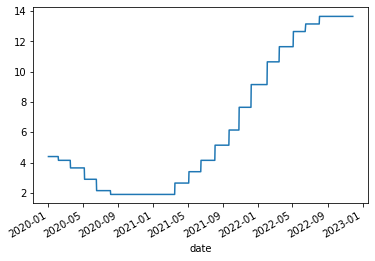

In [6]:
#Configuração da plotagem dos dados em gráfico
#Selecionamos o período covid e pós-covid

ax = dfSelic.query("date >= '2020-01-01'").plot(legend=None)

### O nível de inflação no período

In [7]:
# Devemos buscar agora os dados do ipea data
dfSeriesIpeadata = ipeadatapy.list_series()
dfSeriesIpeadata
dfSeriesIpeadata[dfSeriesIpeadata['NAME'].str.contains("IPCA")]

,CODE,NAME
4593,BM12_IPCA2012,IPCA - núcleo médias aparadas com suavização -...
4594,BM12_IPCA20N12,IPCA - núcleo médias aparadas sem suavização ...
4595,BM12_IPCACOM12,IPCA - preços livres - comercializáveis - taxa...
4596,BM12_IPCAEXC12,IPCA - núcleo por exclusão - sem monitorados e...
4597,BM12_IPCAEXCEX212,IPCA - núcleo por exclusão - EX1 - taxa de var...
4598,BM12_IPCAEXP1212,Expectativa média de Inflação - IPCA - taxa ac...
4599,BM12_IPCAEXP612,Expectativa média de Inflação - IPCA - taxa an...
4600,BM12_IPCANCOM12,IPCA - preços livres - não comercializáveis - ...
4601,BM12_IPCAPL12,IPCA - preços livres - taxa de variação
4602,BM12_IPCAPLBD12,IPCA - preços livres - bens duráveis - taxa de...


In [8]:
#IPCA por mês
dfIPCA = ipeadatapy.timeseries('PAN12_IPCAG12')
dfIPCA.tail(5)

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE ((% a.a.))
DATE,,,,,,
2022-06-01,2022,1,6,PAN12_IPCAG12,2022-06-01T00:00:00-03:00,8.343738
2022-07-01,2022,1,7,PAN12_IPCAG12,2022-07-01T00:00:00-03:00,-7.861667
2022-08-01,2022,1,8,PAN12_IPCAG12,2022-08-01T00:00:00-03:00,-4.234939
2022-09-01,2022,1,9,PAN12_IPCAG12,2022-09-01T00:00:00-03:00,-3.425441
2022-10-01,2022,1,10,PAN12_IPCAG12,2022-10-01T00:00:00-03:00,7.315329


In [9]:
# Renomeando a coluna do dado do IPCA
dfIPCA.rename(columns={"VALUE ((% a.a.))": "IPCA"}, inplace=True)

# Deixando apenas ela no DataFrame e usando [[]] para manter como dataframe
# Usar apenas um colchete ( [] ) retornaria uma série
dfIPCA = dfIPCA[["IPCA"]]
dfIPCA.tail(5)

,IPCA
DATE,
2022-06-01,8.343738
2022-07-01,-7.861667
2022-08-01,-4.234939
2022-09-01,-3.425441
2022-10-01,7.315329


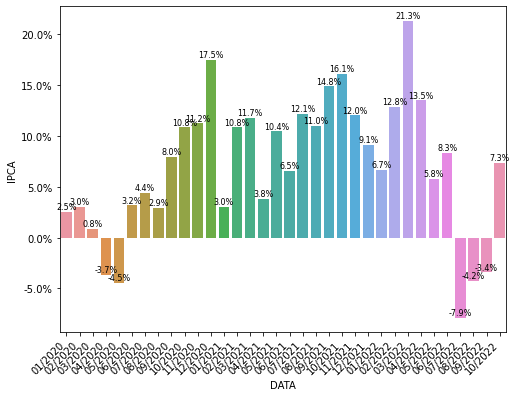

In [10]:
# Dataframe com as datas
dfIPCA["DATA"] = dfIPCA.index

## Dimensionar o gráfico
plt.figure(figsize=(8, 6))

## Criar o objeto
ax = sns.barplot(data=dfIPCA.query("DATA >= '2020-01-01'"), x="DATA", y="IPCA")

## Valores eixo X
vDatas = dfIPCA.query("DATA >= '2020-01-01'")["DATA"].dt.strftime('%m/%Y')
ax.set_xticklabels(labels=vDatas, rotation=45, ha='right')

# Valores eixo Y
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Insrindo os valores nas barras
for p in ax.patches:
    ax.annotate(format(p.get_height() / 100, '.1%'),  # plot valores percentuais
                   (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),  # plottando no centro horizontal da barra e na extremidade externa
                   ha = 'center', va = 'center',
                   fontsize=8)

plt.show()

###Buscando dados do Mercado Imobiliário
[BACEN](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries)

In [12]:
dfMercImob = time_series.read_time_series(bacen_code=21340, as_index=True)

dfMercImob

,value
date,
2001-03-01,100.00
2001-04-01,100.08
2001-05-01,100.15
2001-06-01,100.22
2001-07-01,100.29
...,...
2022-05-01,653.25
2022-06-01,654.19
2022-07-01,655.08


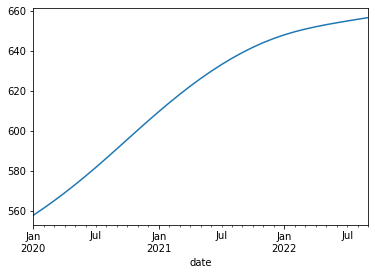

In [13]:
#Configuração da plotagem dos dados em gráfico
#Selecionamos o período covid e pós-covid

ax = dfMercImob.query("date >= '2020-01-01'").plot(legend=None)

###Calcular o poder de compra de uma população

Description
The Big Mac Index is an informal measure of currency exchange rates at ppp. It measures their value against a similar basket of goods and services, in this case a Big Mac. Differing prices at market exchange rates would imply that one currency is under or overvalued.

In [14]:
nasdaqdatalink.ApiConfig.verify_ssl = False

In [15]:
import nasdaqdatalink
nasdaqdatalink.read_key(filename="/data/.corporatenasdaqdatalinkapikey")

In [16]:
##Explorando o Índice Big Mac da Nasdaq

big_mac_brasil = nasdaqdatalink.get('ECONOMIST/BIGMAC_BRA')

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [17]:
#Restringir o range de data

big_mac_b = nasdaqdatalink.get('ECONOMIST/BIGMAC_BRA', start_date = '2020-01-01', end_date = '2022-07-31')
big_mac_b

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2020-01-31,19.9,4.14190,4.804558,3.509700,-15.264,42.000,46.000,54.900,87.100,55.100
2020-07-31,20.9,5.34045,3.913528,3.660245,-31.462,19.100,16.800,33.600,52.300,27.400
2021-01-31,21.9,5.50460,3.978491,3.869258,-29.700,20.100,6.600,27.500,48.400,17.200
2021-07-31,22.9,5.24865,4.363027,4.053097,-22.778,31.512,20.444,30.181,73.924,32.009
2022-01-31,22.9,5.31000,4.312618,3.941480,-25.773,22.899,18.735,24.401,76.575,17.319
2022-07-31,22.9,5.39175,4.247230,4.446602,-17.530,7.021,2.736,14.013,85.742,24.095


### Renda disponível das famílias

In [18]:
dfRenda_media = time_series.read_time_series(bacen_code=29023, as_index=True)
dfRenda_media

,value
date,
2003-03-01,92303.0
2003-04-01,91559.0
2003-05-01,92749.0
2003-06-01,95376.0
2003-07-01,97907.0
...,...
2022-05-01,540160.0
2022-06-01,555573.0
2022-07-01,572295.0


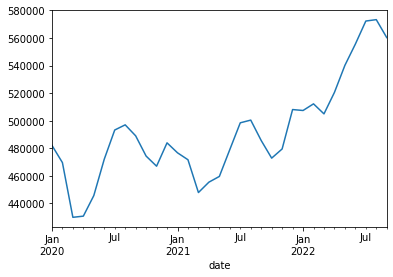

In [19]:
ax = dfRenda_media.query("date >= '2020-01-01'").plot(legend=None)

## Comprometimento de renda das famílias - Serviço da dívida exceto crédito habitacional - Com ajuste sazonal (RNDBF)

In [20]:
## A api do comprometimento total da renda não estava operando, mas o valor para a última data (Ago/22) é de 52,85%.
dfDivida = time_series.read_time_series(bacen_code=29035, as_index=True)
dfDivida

,value
date,
2005-03-01,16.63
2005-04-01,16.89
2005-05-01,17.09
2005-06-01,17.20
2005-07-01,17.32
...,...
2022-05-01,23.75
2022-06-01,24.47
2022-07-01,25.16


In [21]:
#Reshape nos dados
x = dfMercImob
y = dfRenda_media

In [22]:
x.ndim

2

In [23]:
y.ndim

2

In [24]:
x.shape

(259, 1)

In [25]:
y.shape

(235, 1)

In [26]:
#Normalizando as variáveis
from sklearn.preprocessing import MinMaxScaler

#dfRenda_media
dfRenda_media

#Gerando a nova escala
scaler = MinMaxScaler(feature_range= (0,1))
rescaledRenda = scaler.fit_transform(dfRenda_media)

### Teste de Correlação entre o Mercado Imobiliário (Variável Dependente) e o nível de renda média dos dois últimos anos (Variável Independente).


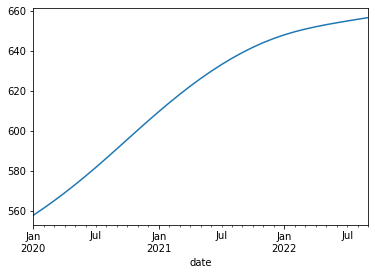

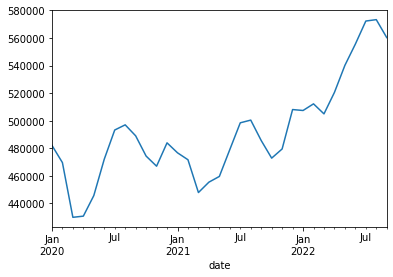

In [32]:
#Configuração da plotagem dos dados em gráfico
#Selecionamos o período covid e pós-covid

ax = dfMercImob.query("date >= '2020-01-01'").plot(legend=None)

ax = dfRenda_media.query("date >= '2020-01-01'").plot(legend=None)

In [42]:
#Transformar dataframe em numpy array

x.to_numpy()
y.to_numpy()




array([[ 92303.],
       [ 91559.],
       [ 92749.],
       [ 95376.],
       [ 97907.],
       [ 98506.],
       [ 96639.],
       [ 96073.],
       [ 97157.],
       [100469.],
       [101339.],
       [100860.],
       [ 99010.],
       [ 98826.],
       [100363.],
       [103929.],
       [107385.],
       [109614.],
       [108715.],
       [109636.],
       [110207.],
       [113912.],
       [113463.],
       [113077.],
       [110173.],
       [109565.],
       [110657.],
       [114763.],
       [118493.],
       [119935.],
       [118745.],
       [119056.],
       [122363.],
       [125155.],
       [126800.],
       [123850.],
       [121554.],
       [119280.],
       [121330.],
       [125352.],
       [129266.],
       [130386.],
       [131432.],
       [132446.],
       [135888.],
       [137056.],
       [138774.],
       [137348.],
       [136639.],
       [135608.],
       [137528.],
       [140630.],
       [143877.],
       [145932.],
       [146600.],
       [14

In [48]:
# Encontrar a correlação entre x e y
df_corr = x.corrwith(y, axis = 0)
print(df_corr)

value    0.946199
dtype: float64
